# STEP1: PRELIMINARY STEPS

Explore the Data
Let's start by loading the loanstats.csv  data as a Pandas DataFrame and viewing the first few rows.

In [3]:
import pandas as pd

# load the training dataset
loanstats = pd.read_csv('LoanStats.csv')
loanstats.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [4]:
loanstats.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


# STEP 2: DATA UNDERSTANDING

Analyse the variables in dataset:


*   SCHEMA
*   SHAPE
*   DESCRIPTIVE STATISTICS
*   FREQUENCY TABLES
*   CHARTS

In [5]:
#View the shape of DATASET
loanstats.shape

(39786, 7)

In [6]:
#Descriptive Statistics
loanstats.describe()

,int_rate,loan_amnt,term,annual_inc
count,39786.000000,39786.000000,39786.000000,3.978600e+04
mean,12.027873,11231.360277,42.448499,6.897907e+04
std,3.727466,7464.542832,10.638782,6.376263e+04
min,5.420000,500.000000,36.000000,4.000000e+03
25%,9.250000,5500.000000,36.000000,4.050000e+04
50%,11.860000,10000.000000,36.000000,5.900000e+04
75%,14.590000,15000.000000,60.000000,8.234250e+04
max,24.590000,35000.000000,60.000000,6.000000e+06


In [7]:
# getting the columns of the dataset
columns = list(loanstats.columns)
columns

['int_rate',
 'loan_amnt',
 'term',
 'grade',
 'home_ownership',
 'annual_inc',
 'purpose']

In [8]:
# examining missing values
print("Missing values distribution: ")
print(loanstats.isnull().mean())
print("")

Missing values distribution: 
int_rate          0.0
loan_amnt         0.0
term              0.0
grade             0.0
home_ownership    0.0
annual_inc        0.0
purpose           0.0
dtype: float64



In [9]:

# check datatype in each column
print("Column datatypes: ")
print(loanstats.dtypes)



Column datatypes: 
int_rate          float64
loan_amnt           int64
term                int64
grade              object
home_ownership     object
annual_inc        float64
purpose            object
dtype: object


In [10]:
#Labels of home ownership type
loanstats['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [11]:
#Labels of purpose
loanstats['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

36    29096
60    10690
Name: term, dtype: int64 



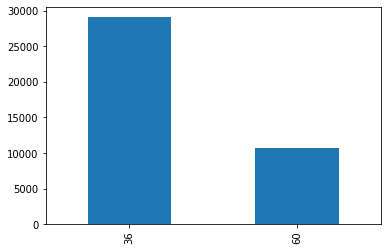

In [12]:
#Comparison of 36 ang 60 terms 
print(loanstats.term.value_counts(), '\n')
loanstats.term.value_counts().plot.bar()

RENT        18918
MORTGAGE    17703
OWN          3064
OTHER          98
NONE            3
Name: home_ownership, dtype: int64 



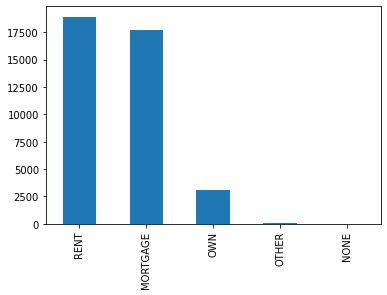

In [13]:
#Comparison  count of types of homes 
print(loanstats.home_ownership.value_counts(), '\n')

loanstats.home_ownership.value_counts().plot.bar()

B    12035
A    10085
C     8111
D     5325
E     2858
F     1054
G      318
Name: grade, dtype: int64 



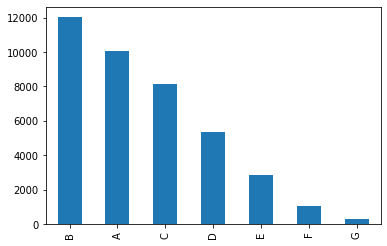

In [14]:
#Comparison  count of grades 
print(loanstats.grade.value_counts(), '\n')
loanstats.grade.value_counts().plot.bar()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 40.0)

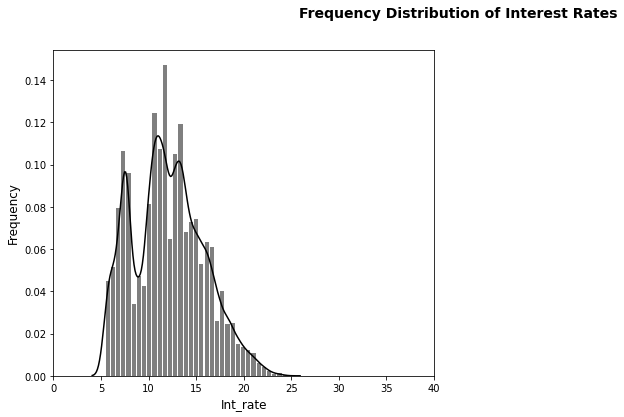

In [15]:
#Frequency Distribution of Interest Rates
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.suptitle('Frequency Distribution of Interest Rates', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(loanstats['int_rate'], color="black", label="No. Words", bins=35, hist_kws={"alpha": 0.5,"rwidth":0.8})

plt.xlabel("Int_rate", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,40])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 300000.0)

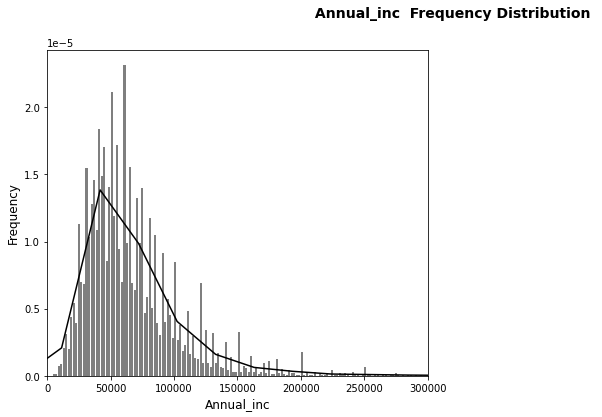

In [16]:
#Annual Income Frequency  Distribution 

plt.figure(figsize=(15,6))
plt.suptitle(' Annual_inc  Frequency Distribution ', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(loanstats['annual_inc'], color="black", label="Annual_inc", bins=3000, hist_kws={"alpha": 0.5,"rwidth":0.8})

plt.xlabel("Annual_inc", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,300000])

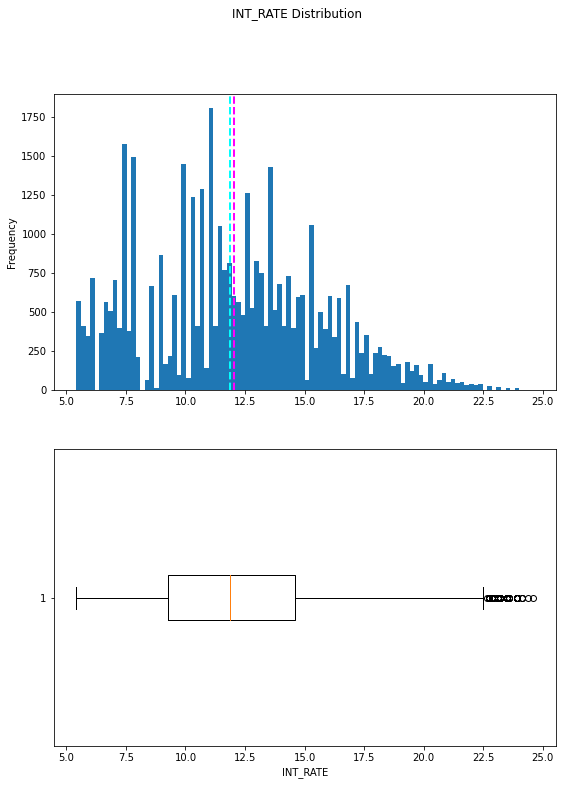

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = loanstats['int_rate']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')


# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('INT_RATE')

# Add a title to the Figure
fig.suptitle('INT_RATE Distribution')

# Show the figure
fig.show()

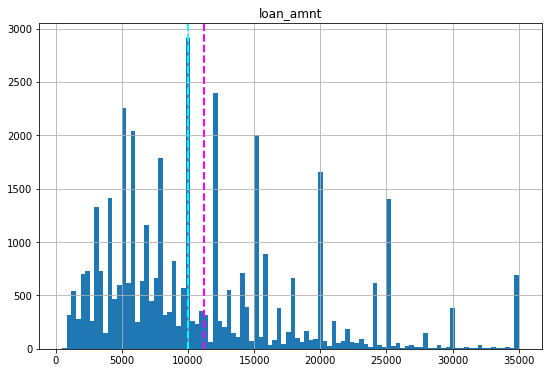

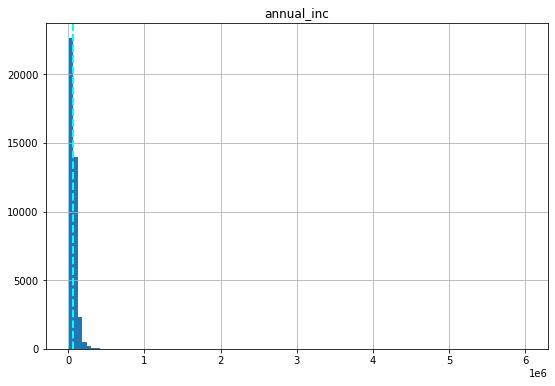

In [18]:
# Plot a histogram for each numeric feature
numeric_features=['loan_amnt','annual_inc']
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = loanstats[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

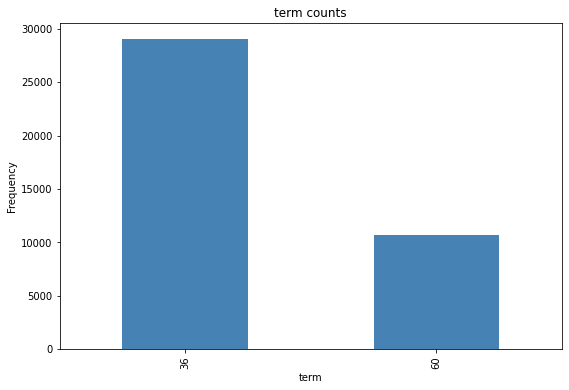

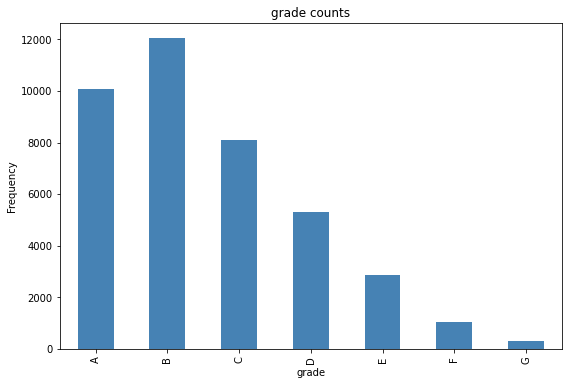

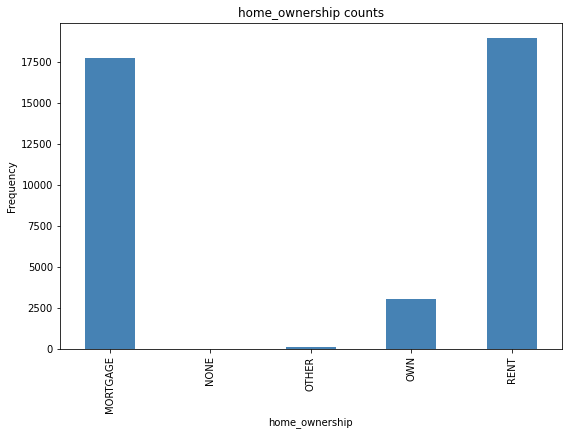

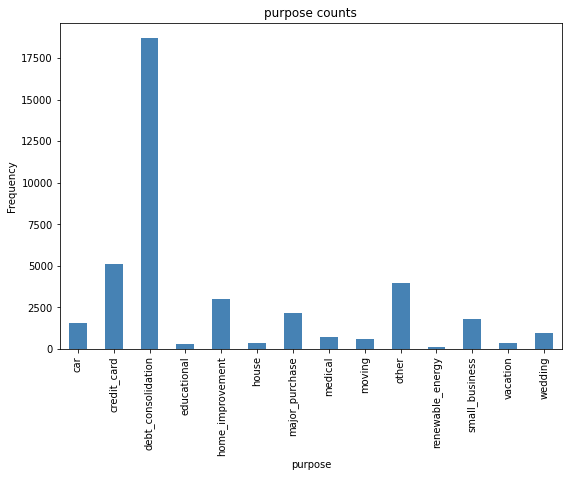

In [19]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['term','grade','home_ownership', 'purpose']

for col in categorical_features:
    counts = loanstats[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

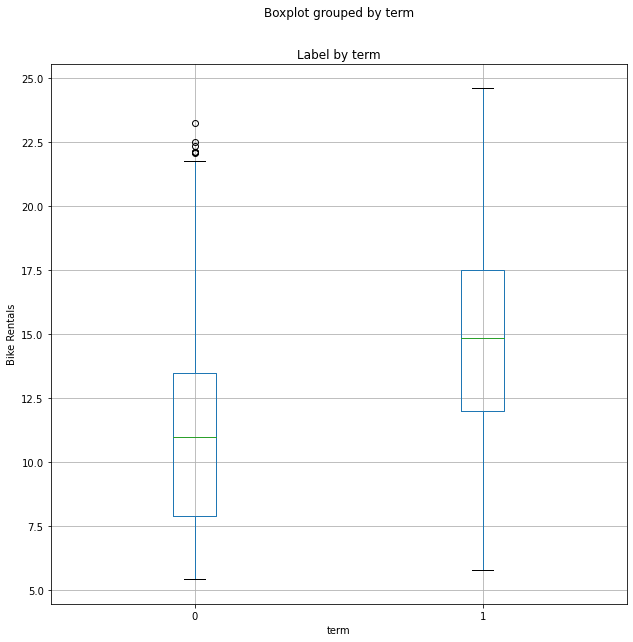

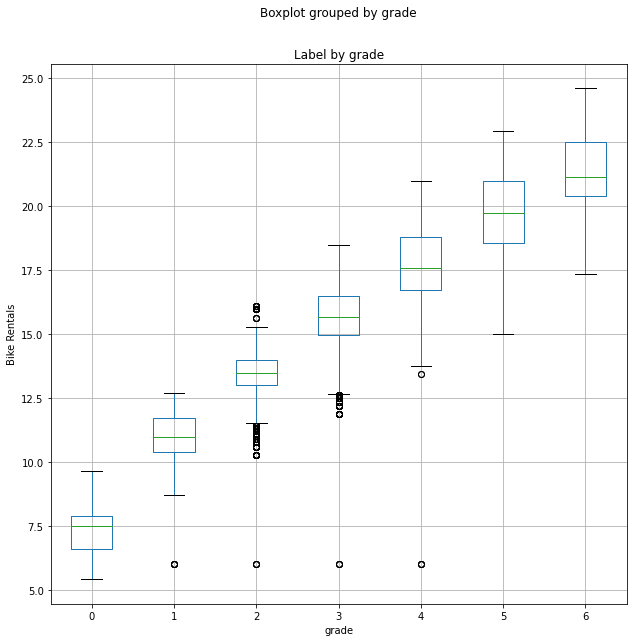

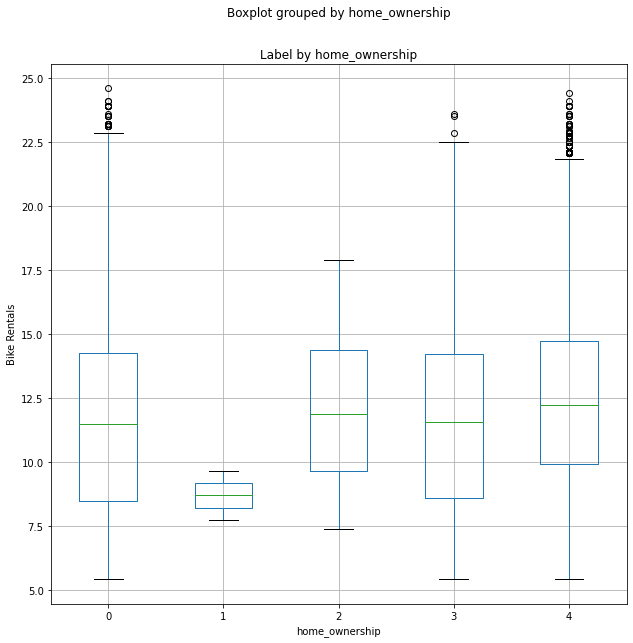

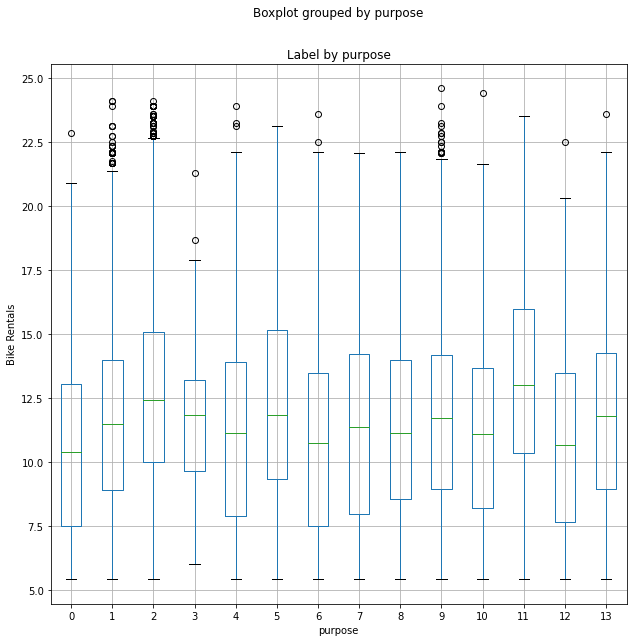

In [22]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    loanstats.boxplot(column = 'int_rate', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

# STEP 3 DATA PREPARATION

TRANSFORMATION OF ALL CATEGORICAL VARIABLES

In [ ]:
# Encoding the  categorical variables 
loanstats['term'] = loanstats.term.astype('category')
loanstats['term']  =  loanstats['term'].cat.codes
loanstats['grade'] = loanstats.grade.astype('category')
loanstats['grade']  =  loanstats['grade'].cat.codes
loanstats['home_ownership'] = loanstats.home_ownership.astype('category')
loanstats['home_ownership']  =  loanstats['home_ownership'].cat.codes
loanstats['purpose'] = loanstats.purpose.astype('category')
loanstats['purpose']  =  loanstats['purpose'].cat.codes


NORMALIZATION OF NUMERICAL VARIABLES

In [23]:
#Normalizing the numerical variables with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
loanstats[['loan_amnt', 'annual_inc']] = scaler.fit_transform(loanstats[['loan_amnt', 'annual_inc']])

SPLIT INTO TEST AND TRAIN DATASETS

In [24]:
# Separate features and labels
X, y = loanstats[['loan_amnt','term','grade','home_ownership','annual_inc','purpose']].values, loanstats['int_rate'].values
print('Features:',X[:6], '\nLabels:', y[:6], sep='\n')

Features:
[[1.30434783e-01 0.00000000e+00 1.00000000e+00 4.00000000e+00
  3.33555704e-03 1.00000000e+00]
 [5.79710145e-02 1.00000000e+00 2.00000000e+00 4.00000000e+00
  4.33622415e-03 0.00000000e+00]
 [5.50724638e-02 0.00000000e+00 2.00000000e+00 4.00000000e+00
  1.37625083e-03 1.10000000e+01]
 [2.75362319e-01 0.00000000e+00 2.00000000e+00 4.00000000e+00
  7.53835891e-03 9.00000000e+00]
 [7.24637681e-02 1.00000000e+00 1.00000000e+00 4.00000000e+00
  1.26751167e-02 9.00000000e+00]
 [1.30434783e-01 0.00000000e+00 0.00000000e+00 4.00000000e+00
  5.33689126e-03 1.30000000e+01]]

Labels:
[10.65 15.27 15.96 13.49 12.69  7.9 ]


In [25]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 27850 rows
Test Set: 11936 rows


In [26]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [27]:
#'loan_amnt','term','grade','home_ownership','annual_inc','purpose'
model.coef_

array([ 0.5129885 ,  0.4048864 ,  2.46164721,  0.04784491, -1.33065641,
       -0.0062949 ])

In [28]:
#Computation of Predicted Labels and Actual Labels
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:6])
print('Actual labels   : ' ,y_test[:6])

Predicted labels:  [11. 10. 13. 11. 15. 11.]
Actual labels   :  [ 9.63 11.48 14.72 11.99 16.07 11.49]


# STEP 4: MODELLING

MODEL: MULTIPLE LINEAR REGRESSION

Gradient Boosting Regressor model from sklearn library was implemented



In [29]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

GradientBoostingRegressor() 

MSE: 0.9891086567005429
RMSE: 0.9945394193799173
R2: 0.9283166890318585


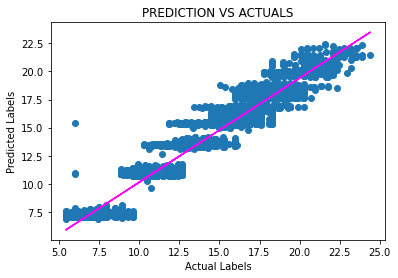

In [43]:
#Regression model without hyperameters


modeltest = [
             ['GradientBoostingRegressor :', GradientBoostingRegressor()]
             
              ]

for name,modeltest in modeltest:

  model = modeltest.fit(X_train, y_train)
  print (model, "\n")

  # Evaluate the model using the test data
  predictions = model.predict(X_test)
  mse = mean_squared_error(y_test, predictions)
  print("MSE:", mse)
  rmse = np.sqrt(mse)
  print("RMSE:", rmse)
  r2 = r2_score(y_test, predictions)
  print("R2:", r2)

  # Plot predicted vs actual
  plt.scatter(y_test, predictions)
  plt.xlabel('Actual Labels')
  plt.ylabel('Predicted Labels')
  plt.title('PREDICTION VS ACTUALS')
  # overlay the regression line
  z = np.polyfit(y_test, predictions, 1)
  p = np.poly1d(z)
  plt.plot(y_test,p(y_test), color='magenta')
  plt.show()








MODEL: HYPERPARAMETER TUNING/ GRID SEARCH



1.   10 iterations of model with different hyperparameters. 
2.   Control for overfitting



Best parameter combination: {'learning_rate': 0.2, 'n_estimators': 40} 

GradientBoostingRegressor(learning_rate=0.2, n_estimators=40) 

MSE: 0.9889671133042589
RMSE: 0.9944682565593831
R2: 0.9283269470547992


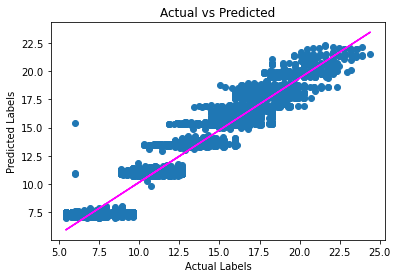

Training Score for   92.83
Testing Score for  92.83


In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# Use a Gradient Boosting algorithm with different hyperparameters
alg = [
     [{
         #hyperpamaters choosen: learning_rate and n_estimators
 'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
  'n_estimators' : [10,20,30,40,50,60,70,80,90,100]
 }, GradientBoostingRegressor()]


              ]



for params,alg in alg:
  # Find the best hyperparameter combination to optimize the R2 metric
  score = make_scorer(r2_score)
  gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
  gridsearch.fit(X_train, y_train)
  print("Best parameter combination:", gridsearch.best_params_, "\n")

  # Get the best model
  model=gridsearch.best_estimator_
  print(model, "\n")

  # Evaluate the model using the test data
  predictions = model.predict(X_test)
  mse = mean_squared_error(y_test, predictions)
  print("MSE:", mse)
  rmse = np.sqrt(mse)
  print("RMSE:", rmse)
  r2 = r2_score(y_test, predictions)
  print("R2:", r2)

  # Plot predicted vs actual
  plt.scatter(y_test, predictions)
  plt.xlabel('Actual Labels')
  plt.ylabel('Predicted Labels')
  plt.title('Actual vs Predicted')
  # overlay the regression line
  z = np.polyfit(y_test, predictions, 1)
  p = np.poly1d(z)
  plt.plot(y_test,p(y_test), color='magenta')
  plt.show()
  
#Control for overfitting: campare training and test datasets
  clf=model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
    
  print(f'Training Score for   {clf.score(X_train,y_train) * 100:.2f}' )
  print(f'Testing Score for  {clf.score(X_test,y_test) * 100:.2f}' )
 


